# Climatology of convection (MLD) and stratification (SI)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir, getMonths

In [2]:
data = pd.read_csv(datadir+'monthly_timeseries.csv',index_col=0)
dates = pd.to_datetime(data['dates'])

In [3]:
months = getMonths(dates)
month_labels_shift = ['J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M'] # for shift=5: start in June

def makeClim(data,shift=5):
    data_clim = np.zeros(12)
    for i in range(12):
        data_clim[i] = np.nanmean([data[j] for j in months[(i+shift)%12]],axis=0)
    return data_clim
        
conv_clim = makeClim(data['MLD'])
strat_clim = makeClim(data['SI_all_total'])

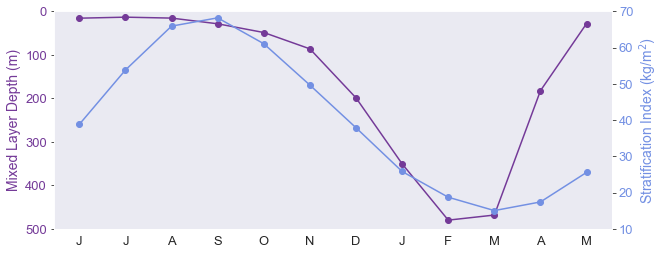

In [4]:
def plotClim(ax,data,color,label):
    ax.plot(range(12),data,color=color)
    ax.scatter(range(12),data,color=color)
    ax.tick_params(axis='both', labelsize=13)
    ax.tick_params(axis='y', labelcolor=color)
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels_shift, fontsize=13)
    ax.set_ylabel(label,fontsize=14,color=color)

fig, ax1 = plt.subplots(1,1,figsize=(10,4))
ax2 = ax1.twinx()

cmap = matplotlib.cm.get_cmap('cmo.dense')

plotClim(ax1,conv_clim,cmap(0.7),'Mixed Layer Depth (m)')
ax1.set_ylim(0,500)
ax1.set_ylim(ax1.get_ylim()[::-1])
plotClim(ax2,strat_clim,cmap(0.4),'Stratification Index (kg/m$^2$)')
ax2.set_ylim(10,70)

plt.subplots_adjust(hspace=0.35)
#plt.savefig(figdir+'conv_strat_clim.pdf',bbox_inches='tight')
plt.show()

In [5]:
def makeClimSTD(data,shift=5):
    data_std = np.zeros(12)
    for i in range(12):
        data_std[i] = np.nanstd([data[j] for j in months[(i+shift)%12]],axis=0)
    return data_std
        
conv_std = makeClimSTD(data['MLD'])
strat_std = makeClimSTD(data['SI_all_total'])

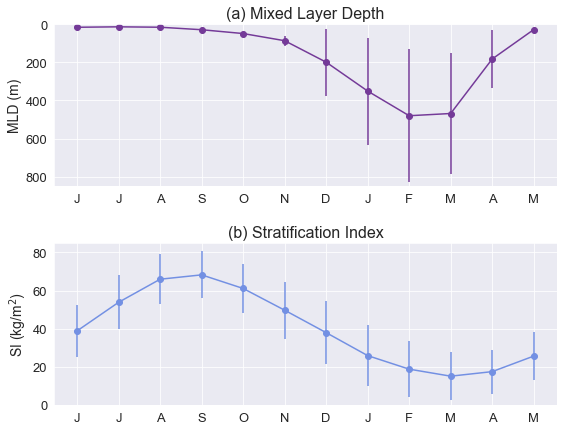

In [6]:
def plotClimSTD(ax,data,data_std,color,label):
    ax.errorbar(range(12),data,yerr=data_std,color=color,ecolor=color)
    ax.scatter(range(12),data,color=color)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels_shift, fontsize=13)
    ax.set_ylabel(label,fontsize=14)

sns.set_style('darkgrid')
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(9,7))

cmap = matplotlib.cm.get_cmap('cmo.dense')

plotClimSTD(ax1,conv_clim,conv_std,cmap(0.7),'MLD (m)')
ax1.set_ylim(0,850)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_title('(a) Mixed Layer Depth',fontsize=16)
plotClimSTD(ax2,strat_clim,strat_std,cmap(0.4),'SI (kg/m$^2$)')
ax2.set_ylim(0,85)
ax2.set_title('(b) Stratification Index',fontsize=16)

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'conv_strat_clim_std.pdf',bbox_inches='tight')
plt.show()